# Flights Data Exploration Challenge
In this challange, we'll explore a real-world dataset containing flights data from the US Department of Transportation.

**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
flight = pd.read_csv('flights.csv')
flight.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### Cleaning the given data

In [3]:
flight.shape

(271940, 20)

Cleaning missing values

In [4]:
flight.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Here we observe that the **DepDel15** column has about **2761** missing values. Departures are considered late if the delay is 15 minutes or more, so let's see the delays for the ones with a null late indicator:

In [5]:
flight[flight.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

The min, max, and mean are all 0, so it seems that none of these were actually late departures. Let's replace the missing DepDel15 indicator with a 0 and confirm there are no more missing values.

In [6]:
flight.DepDel15 = flight.DepDel15.fillna(0)
flight.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

#### Cleaning Outlier Values
In order to clean the outlier values we will check the distributions of **DepDelay** and **ArDealy** columns.

DepDelay 
Minimum:-63.000000
Mean:10.350449
Median:-1.000000
Mode:-3.000000\Maximum:1425.000000


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17076/712070664.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17076/712070664.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ArrDelay 
Minimum:-75.000000
Mean:6.496650
Median:-3.000000
Mode:0.000000\Maximum:1440.000000


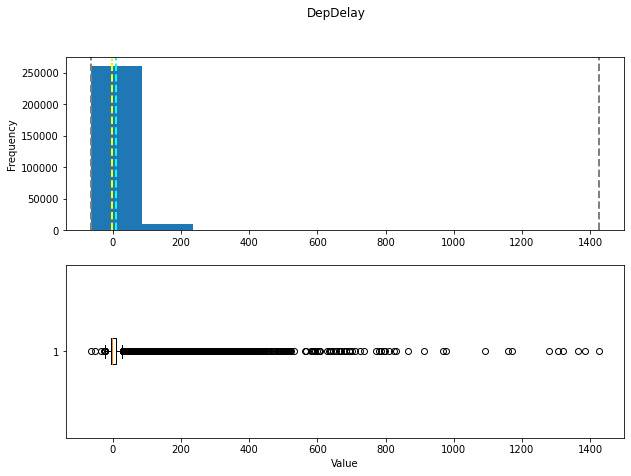

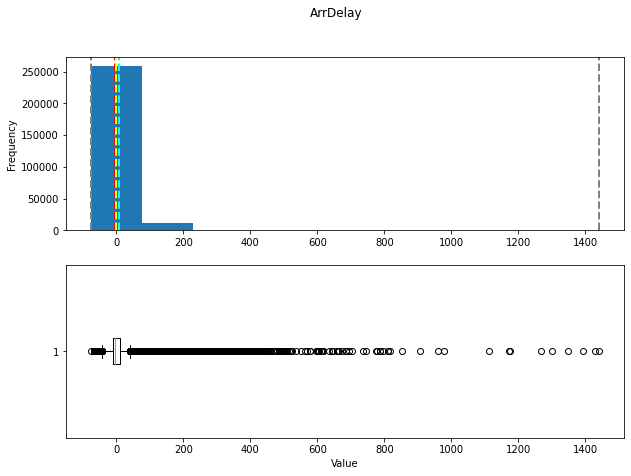

In [7]:
def show_distributions(var_data):
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]
    
    print(var_data.name, '\nMinimum:{:2f}\nMean:{:2f}\nMedian:{:2f}\nMode:{:2f}\Maximum:{:2f}'.format(min_val, mean_val,
                                                                                                     median_val, mode_val,
                                                                                                     max_val))
    
    fig, ax = plt.subplots(2, 1, figsize=(10,7))
    
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)
    
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    fig.suptitle(var_data.name)
    fig.show()
    
delay_fields = ['DepDelay', 'ArrDelay']
for col in delay_fields:
    show_distributions(flight[col])

There are a outliers at the lower and upper ends of both variables, particularly at the upper end.

Let's trim the data so that we include only rows where the values for these fields are within the 1st and 90th percentile.

DepDelay 
Minimum:-11.000000
Mean:-0.921692
Median:-2.000000
Mode:-3.000000\Maximum:16.000000
ArrDelay 
Minimum:-32.000000
Mean:-5.030276
Median:-6.000000
Mode:0.000000\Maximum:37.000000


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17076/712070664.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_17076/712070664.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


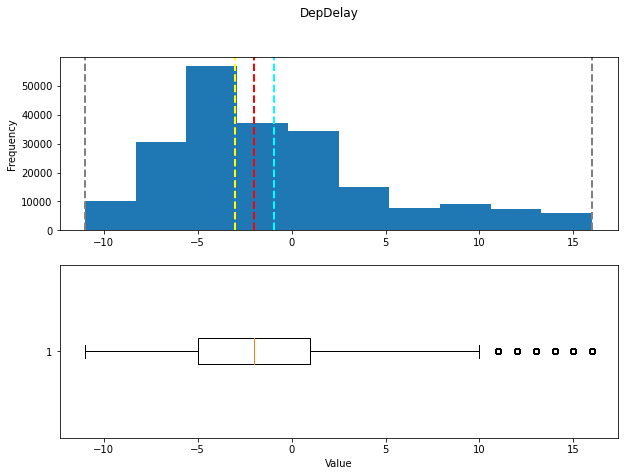

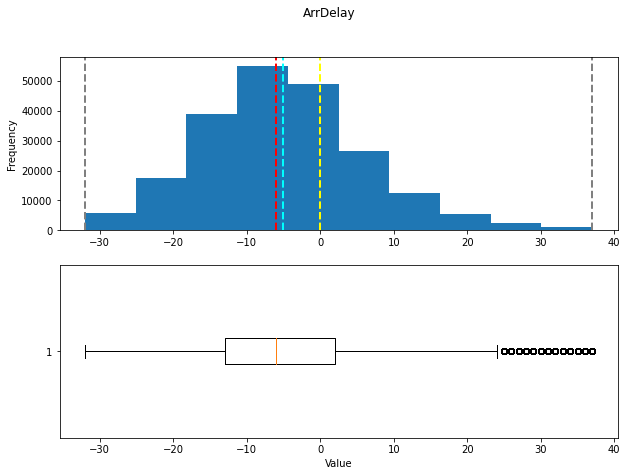

In [8]:
ArrDelay_01pcntile = flight.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = flight.ArrDelay.quantile(0.90)
flight = flight[flight.ArrDelay > ArrDelay_01pcntile]
flight = flight[flight.ArrDelay < ArrDelay_90pcntile]

DepDelay_01pcntile = flight.DepDelay.quantile(0.01)
DepDelay_90pcntile = flight.DepDelay.quantile(0.90)
flight = flight[flight.DepDelay > DepDelay_01pcntile]
flight = flight[flight.DepDelay < DepDelay_90pcntile]

for col in delay_fields:
    show_distributions(flight[col])

Performing **Exploratory Data Analysis** on the given data

In [9]:
flight.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


What are the mean departure values?

In [10]:
flight[delay_fields].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

How do the carriers compare in terms of arrival delay performance?

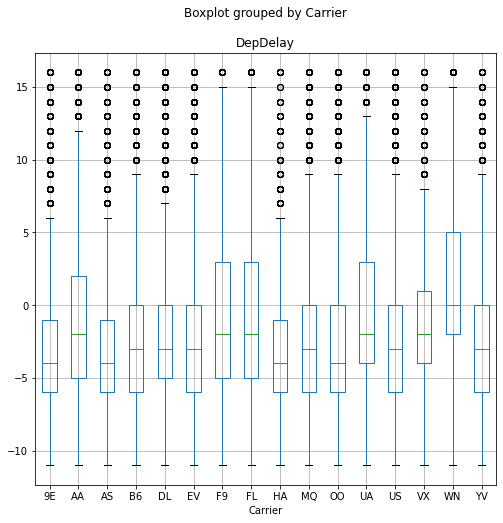

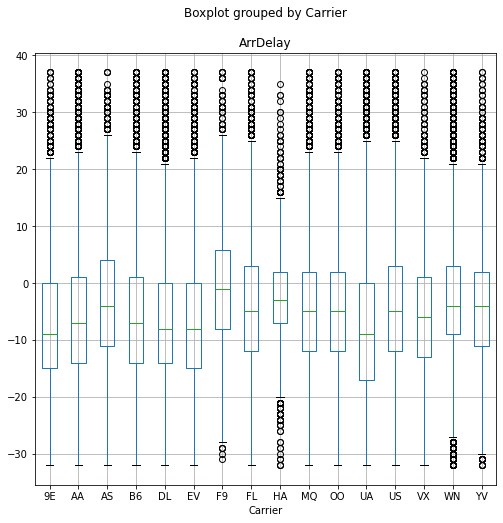

In [11]:
for col in delay_fields:
    flight.boxplot(column = col, by = 'Carrier', figsize=(8,8))

Are some days of the week more prone to arrival days than others?

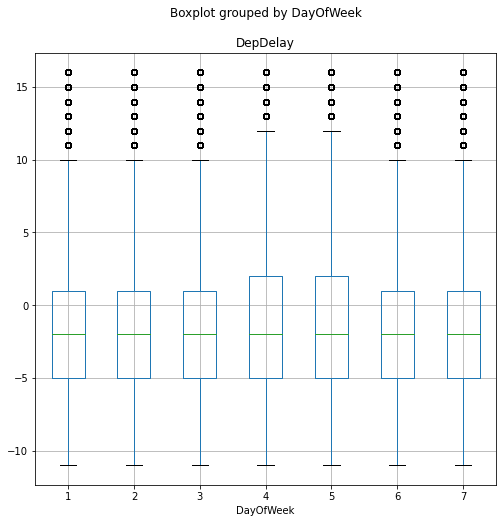

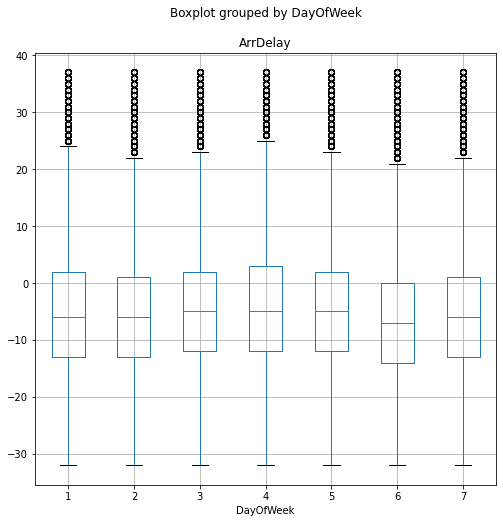

In [12]:
for col in delay_fields:
    flight.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

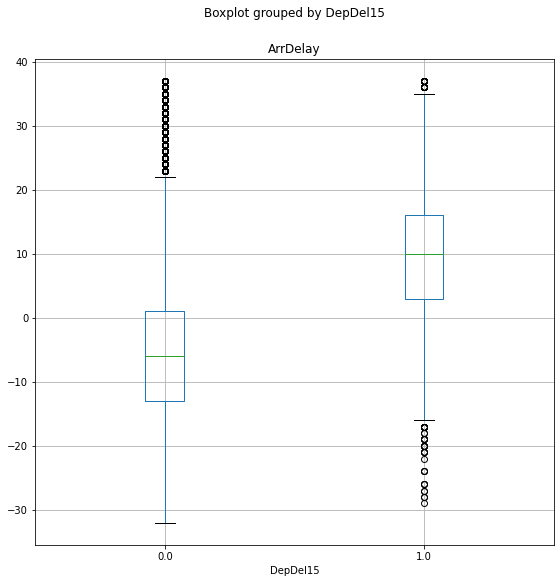

In [15]:
flight.boxplot(column = 'ArrDelay', by = 'DepDel15', figsize=(9,9))